## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [1]:
import os
import keras

# 請嘗試設定 GPU：os.environ


Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [30]:
## 資料前處理
from sklearn.preprocessing import MinMaxScaler
import numpy as np
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    scaler = MinMaxScaler()
    result = scaler.fit_transform(x)
    return result

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [31]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [32]:
x_train.shape[1:]

(3072,)

In [36]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256,256,128,64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [37]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total para

In [38]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [39]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0804 12:10:08.346241 15388 deprecation_wrapper.py:119] From c:\users\susan01\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0804 12:10:08.376154 15388 deprecation_wrapper.py:119] From c:\users\susan01\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [40]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0804 12:10:10.238610 15388 deprecation.py:323] From c:\users\susan01\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0804 12:10:10.456026 15388 deprecation_wrapper.py:119] From c:\users\susan01\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 24s 489us/step - loss: 1.9204 - acc: 0.2979 - val_loss: 1.7422 - val_acc: 0.3674
Epoch 2/100
50000/50000 [==============================] - 23s 469us/step - loss: 1.7099 - acc: 0.3849 - val_loss: 1.6578 - val_acc: 0.4109
Epoch 3/100
50000/50000 [==============================] - 24s 471us/step - loss: 1.6195 - acc: 0.4167 - val_loss: 1.5801 - val_acc: 0.4317
Epoch 4/100
50000/50000 [==============================] - 24s 482us/step - loss: 1.5572 - acc: 0.4404 - val_loss: 1.5206 - val_acc: 0.4557
Epoch 5/100
50000/50000 [==============================] - 22s 446us/step - loss: 1.5086 - acc: 0.4577 - val_loss: 1.5240 - val_acc: 0.4552
Epoch 6/100
50000/50000 [==============================] - 25s 507us/step - loss: 1.4702 - acc: 0.4739 - val_loss: 1.4660 - val_acc: 0.4729
Epoch 7/100
50000/50000 [==============================] - 27s 530us/step - loss: 1.4301 - acc: 0.4889 - val_l

Epoch 59/100
50000/50000 [==============================] - 23s 454us/step - loss: 0.4407 - acc: 0.8408 - val_loss: 2.4443 - val_acc: 0.4999
Epoch 60/100
50000/50000 [==============================] - 23s 456us/step - loss: 0.4225 - acc: 0.8464 - val_loss: 2.5404 - val_acc: 0.4989
Epoch 61/100
50000/50000 [==============================] - 23s 454us/step - loss: 0.4060 - acc: 0.8537 - val_loss: 2.6185 - val_acc: 0.4917
Epoch 62/100
50000/50000 [==============================] - 23s 456us/step - loss: 0.4042 - acc: 0.8550 - val_loss: 2.5705 - val_acc: 0.4921
Epoch 63/100
50000/50000 [==============================] - 23s 454us/step - loss: 0.4165 - acc: 0.8479 - val_loss: 2.6227 - val_acc: 0.5028
Epoch 64/100
50000/50000 [==============================] - 23s 457us/step - loss: 0.3811 - acc: 0.8642 - val_loss: 2.6709 - val_acc: 0.4967
Epoch 65/100
50000/50000 [==============================] - 22s 449us/step - loss: 0.3853 - acc: 0.8623 - val_loss: 2.6541 - val_acc: 0.4984
Epoch 66/100


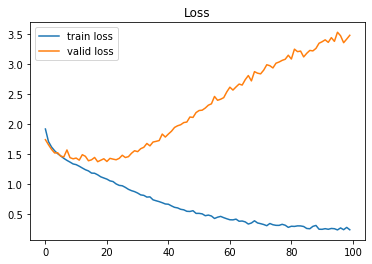

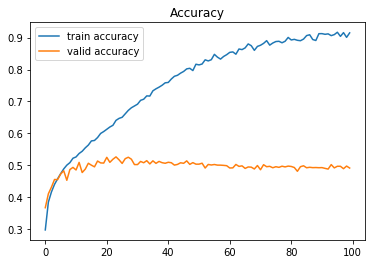

In [42]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()